# The SIR Model for Spread of Disease


## 1) SIR differential equation
$S=S(t)$: # susceptible, healthy individuals that can be infected

$I=I(t)$: # infected indiviuals

$R=R(t)$: # recovered/deceased individuals

$N$: # population

To avoid the computational expense, let's only deal with the fraction of the population

$$s(t)=\frac{S(t)}{N}, i(t)=\frac{I(t)}{N}, r(t)=\frac{R(t)}{N}$$

$\beta$ : # contacts of susceptible individuals that are sufficient to spread the diseases

$\gamma$ : Fraction of population recover each day

**Assumption:**

* Recovered individuals gain the immunity (it can be lost over time but the pandemic is still at the early stage)

* The population is a constant, ignore death/birth/immigration and other factors

Since susceptible depends on the number of infected it is decreasing over time

(1) **Susceptible equation:** 
$$\frac{ds}{dt}=-\beta s(t) i(t)$$ 

(2) **Recovery equation:** 
$$\frac{dr}{dt}=\gamma i(t)$$

Since 
$$\frac{ds}{dt}+\frac{di}{dt}+\frac{dr}{dt}=0$$

(3) **Infected Equation:** 
$$\frac{di}{dt}=\beta s(t) i(t) - \gamma i(t)$$

Note that we know $s(t_0), i(t_0), r(t_0),N$

We  also do not have the constants $\beta$ and $\gamma$, we will find it with the real data in section 4

## 2) Runge-Kutta

It is hard to solve the differential equations (1), (2), and (3) for s(t), r(t), and s(t) but there is a method that can approximate these values at time t with high accuracy. The method is called the 4th Order Runge-Kutta. (The higher the order, the more accurate result)

Consider the differential Equation 
$$\frac{d y}{d x}=f(x, y), y\left(x_{0}\right)=y_{0}$$

Calculate successively

$$ k_{1}=h f\left(x_{0}, y_{0}\right) $$
$$k_{2} =h f\left(x_{0}+\frac{h}{2}, y_{0}+\frac{k_{1}}{2}\right)$$
$$k_{3} =h f\left(x_{0}+\frac{h}{2}, y_{0}+\frac{k_{2}}{2}\right)$$
$$k_{4}=h f\left(x_{0}+h, y_{0}+k_{3}\right)$$

$$k=\frac{1}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right)$$
Since,
$$\ y_{1}=y_{0}+k \text{ and } x_{1}=x_{0}+h$$
Therefore,
$$y_{n+1}=y_{n}+\frac{1}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right)+o\left(h^{5}\right)$$



## 3) Calculation

In [10]:
import matplotlib.pyplot as plt

In [250]:
# Susceptible equation
def dsdt(s, i, beta):
    return -beta*s*i

# Infected equation
def didt(s, i, beta, gamma):
    return beta*s*i - gamma*i

# Recovered/deceased equation
def drdt(i, gamma):
    return gamma*i

In [276]:
#4th order Runge-Kutta for 1 time step
def rk_4th(s, i, r, dsdt, didt, drdt, beta, gamma, h):
    s1 = h*dsdt(s, i, beta)
    i1 = h*didt(s, i, beta, gamma)
    r1 = h*drdt(i, gamma)

    s2 = h*dsdt(s + s1*0.5, i + i1*0.5, beta)
    i2 = h*didt(s + s1*0.5, i + i1*0.5, beta, gamma)
    r2 = h*drdt(i + i1*0.5, gamma)

    s3 = h*dsdt(s + s2*0.5, i + i2*0.5, beta)
    i3 = h*didt(s + s2*0.5, i + i2*0.5, beta, gamma)
    r3 = h*drdt(i + i2*0.5, gamma)

    s4 = h*dsdt(s + s3, i + i3, beta)
    i4 = h*didt(s + s3, i + i3, beta, gamma)
    r4 = h*drdt(i + i3, gamma)
    
    s = s + (s1 + 2*(s2 + s3) + s4)/6
    i = i + (i1 + 2*(i2 + i3) + i4)/6
    r = r + (r1 + 2*(r2 + r3) + r4)/6

    return s, i, r

In [307]:
#Initialize s,i,r and iterate 1000 days
def SIR(N, i0, beta, gamma, h):
    
    # Initial condition
    s = float(N-1)/N -i0
    i = float(1)/N +i0
    r = 0

    sus, inf, rec= [],[],[]
    for j in range(1000): 
        sus.append(s)
        inf.append(i)
        rec.append(r)
        s,i,r = rk_4th(s, i, r, dsdt, didt, drdt, beta, gamma, h)

    return sus, inf, rec

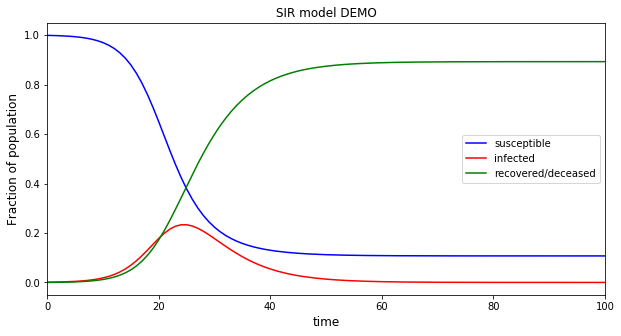

In [337]:
N = 327.2*(10**6)
i0 = 311357/N  #fraction of infected
beta = 0.5
gamma = 0.2
h = 1

sus, inf, rec = SIR(N, i0, beta, gamma, h)

f = plt.figure(figsize=(10,5)) 
plt.plot(sus, 'b', label='Susceptible');
plt.plot(inf, 'r', label='Infected');
plt.plot(rec, 'g', label='Recovered/Deceased');
plt.title("SIR model DEMO")
plt.xlabel("Day", fontsize=12);
plt.ylabel("Fraction of population", fontsize=12);
plt.legend(loc='best')
plt.xlim(0,100)
plt.show()

## 4) Why is social distance important?

The $\gamma$ constant is the recovery rate. It also indicates the effectiveness of medical treatment. Assume it takes on average 14 days to treat a patient so $\gamma=\frac{1}{14}$. Since there is no major medical advancement yet, we are only in control of the $\beta$, which is the rate of transmitting the disease. 

Decreasing $\beta$ is the same as flattening the infected curve. There are two main reasons we want to flatten it:

* Reducing the number of deceased

* Preventing hospital overload

Let's take a look at different values of $\beta$ 

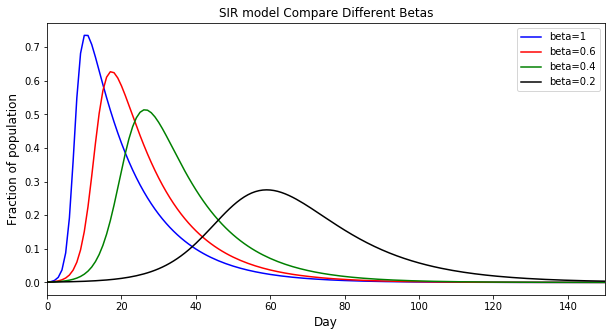

In [340]:
N = 327.2*(10**6)
i0 = 311357/N #fraction of infected
gamma = 1/14
h = 1
beta_1 = 1
beta_2 = 0.6
beta_3 = 0.4
beta_4 = 0.2

sus, inf_1, rec = SIR(N, i0, beta_1, gamma, h)
sus, inf_2, rec = SIR(N, i0, beta_2, gamma, h)
sus, inf_3, rec = SIR(N, i0, beta_3, gamma, h)
sus, inf_4, rec = SIR(N, i0, beta_4, gamma, h)

f = plt.figure(figsize=(10,5)) 

plt.plot(inf_1, 'b', label='beta={}'.format(beta_1));
plt.plot(inf_2, 'r', label='beta={}'.format(beta_2));
plt.plot(inf_3, 'g', label='beta={}'.format(beta_3))
plt.plot(inf_4, 'black', label='beta={}'.format(beta_4))

plt.title("SIR model Compare Different Betas")
plt.xlabel("Day", fontsize=12);
plt.ylabel("Fraction of population", fontsize=12);
plt.legend(loc='best')
plt.xlim(0,150)
plt.show()